In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
#configuration of the values
prices = np.linspace(15.0, 24.0, num=10, endpoint=True)

# discrete values of bids
bids = np.linspace(0.05, 2.0, num=10, endpoint=True)
#bids = np.array([0.03, 0.04, 0.07, 0.10, 0.18, 0.29, 0.47, 0.77, 1.20, 2.0])

clicks = [np.logspace(0.0, 200.0, num=10, endpoint=True),]
          #[0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
          #[0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


#customer categories
categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT
fractions = [0.25, 0.30, 0.45]

probabilities = [[0.25, 0.29, 0.30, 0.28, 0.25, 0.20, 0.16, 0.14, 0.145, 0.16],
                 [0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
                 [0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]


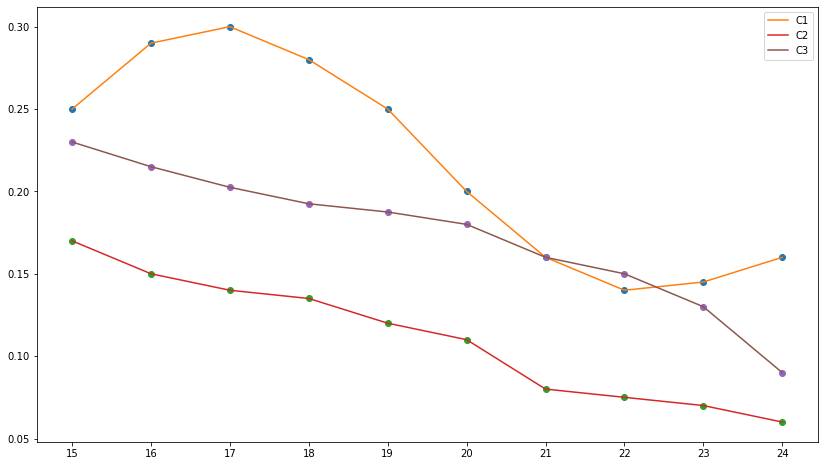

In [4]:
# CONVERSION RATES PLOTS
plt.figure(figsize=(14,8))
plt.xticks(prices)
for i in range(0,len(probabilities)):
    y = probabilities[i]
    x = prices
    f2 = interp1d(x, y, kind='cubic')
    
    plt.plot(x, y, 'o') ##
    plt.plot(x, f2(x), '-', label=categories[i])
    
plt.legend(loc='best')
plt.show()

In [5]:
np.average(probabilities, axis=0, weights=fractions)

array([0.217   , 0.21425 , 0.208125, 0.197125, 0.182875, 0.164   ,
       0.136   , 0.125   , 0.11575 , 0.0985  ])

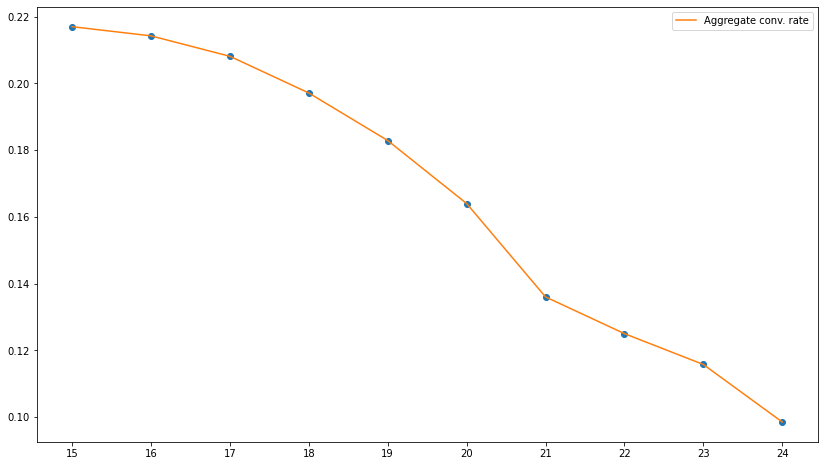

In [6]:
### aggregate conv rate curve
plt.figure(figsize=(14,8))
plt.xticks(prices)

y = np.average(probabilities, axis=0, weights=fractions)
x = prices
f2 = interp1d(x, y, kind='cubic')
    
plt.plot(x, y, 'o') ##
plt.plot(x, f2(x), '-', label='Aggregate conv. rate')
    
plt.legend(loc='best')
plt.show()

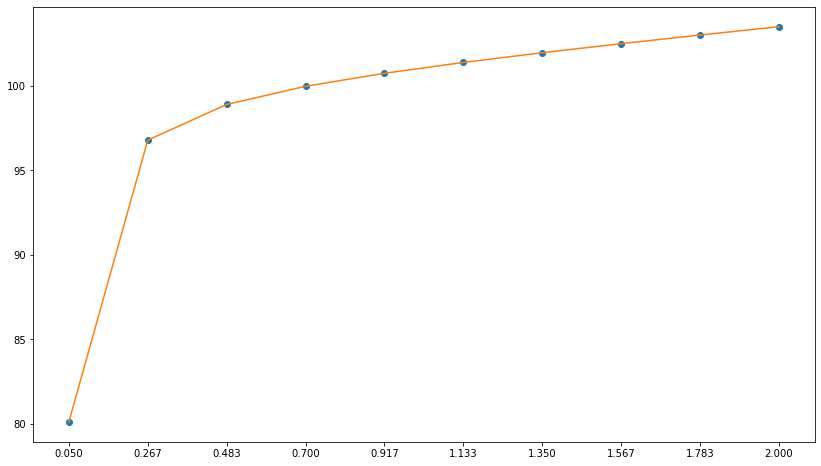

In [29]:
# discrete values of bids
bids = np.linspace(0.05, 2.0, num=10, endpoint=True)
#bids = np.array([0.03, 0.04, 0.07, 0.10, 0.18, 0.29, 0.47, 0.77, 1.20, 2.0])

#customer categories
#categories = ["C1", "C2", "C3"] 
#c1 - TRUE TRUE
#c2 - FALSE FALSE (NO ONLINE, NO SPESSO)
#c3 - TF FT

clicks = [np.logspace(0.0, 200.0, num=10, endpoint=True),]
          #[0.17, 0.15, 0.14, 0.135, 0.12, 0.11, 0.08, 0.075, 0.07, 0.06],
          #[0.23, 0.215, 0.2025, 0.1925, 0.1875, 0.18, 0.16, 0.15, 0.13, 0.09]]
        


plt.figure(figsize=(14,8))
plt.xticks(bids)


x = bids
y = (2*x**2-1)/x + 100
f2 = interp1d(x, y, kind='linear')
    

plt.plot(x, y, 'o') ##
plt.plot(x, f2(x), '-', label=categories[i])
plt.show()



In [8]:
y = (2*x**2-1)/x + 100
y

array([ 80.1       ,  96.78333333,  98.89770115,  99.97142857,
       100.74242424, 101.38431373, 101.95925926, 102.49503546,
       103.005919  , 103.5       ])

80.10042836583146


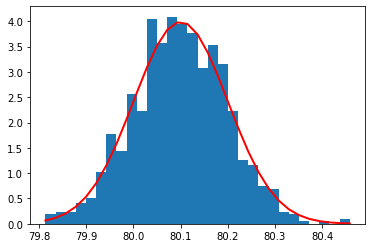

96.73220582661854


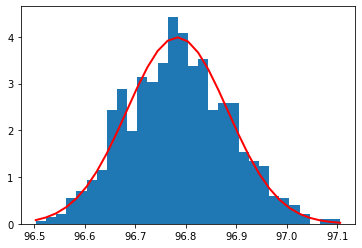

98.88961167605741


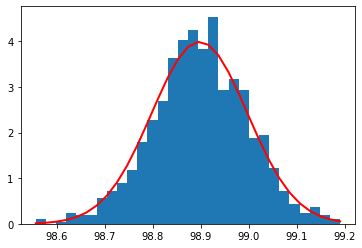

100.04249481812225


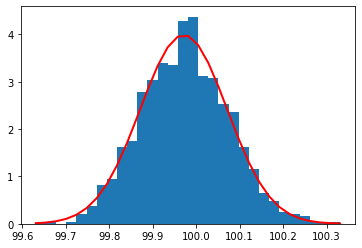

100.84462880422903


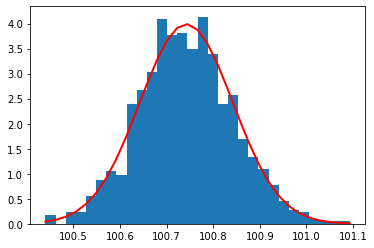

101.39952137372515


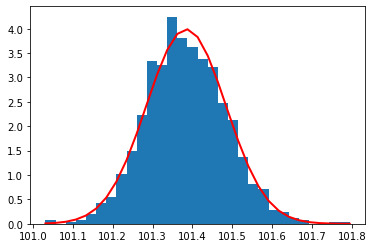

101.96421126248629


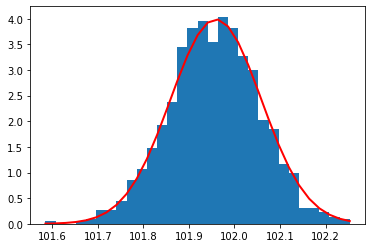

102.57530278399483


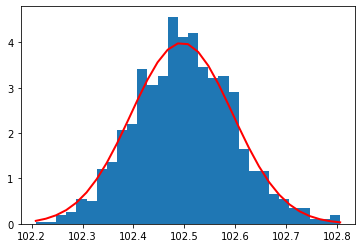

103.1460264029085


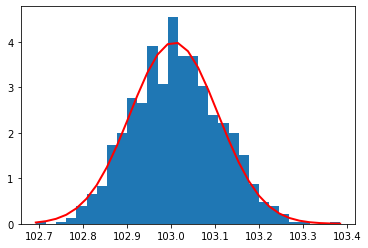

103.5906981190067


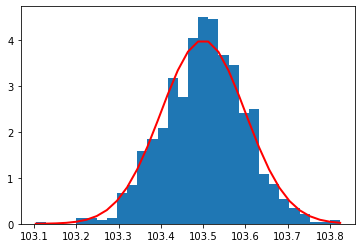

In [39]:

for i in range (0,len(y)):
    
    m=y[i]
    sigma=0.1
    gaussian=np.random.normal(m, sigma, 1000) #insert 1 to obtain only 1 sample
    
    count, bins, ignored = plt.hist(gaussian, 30, density=True) #plot sampled distribution
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                   np.exp( - (bins - m)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()


in_array :  [15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]

out_array_1 :  [0.24876369 0.24759762 0.24534202 0.2410069  0.2327774  0.21751542
 0.19039854 0.14569574 0.08037818 0.        ]

out_array_2 :  [0.16388469 0.15828863 0.14791048 0.12947101 0.0990731  0.05465717
 0.         0.         0.         0.        ]

out_array_3 :  [0.22994324 0.22984574 0.22958092 0.22886259 0.22692129 0.22172634
 0.2081841  0.17516666 0.10628695 0.        ]


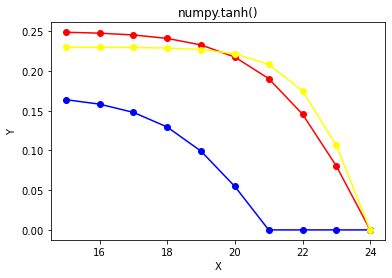

In [89]:
in_array = np.linspace(15.0, 24.0, num=10, endpoint=True)
    
coefficient_1= 0.25
x_offset_1=8
y_offset_1= 0
dilation_1= 3


coefficient_2= 0.17
x_offset_2=7
y_offset_2= 0
dilation_2= 3


coefficient_3= 0.23
x_offset_3=12
y_offset_3= 0
dilation_3= 2


out_array_1= coefficient_1 * np.tanh(x_offset_1- in_array / dilation_1) + y_offset_1

out_array_1=np.maximum(0,out_array_1)


out_array_2= coefficient_2 * np.tanh(x_offset_2- in_array / dilation_2) + y_offset_2

out_array_2=np.maximum(0,out_array_2)


out_array_3= coefficient_3 * np.tanh(x_offset_3- in_array / dilation_3) + y_offset_3

out_array_3=np.maximum(0,out_array_3)
  
print("in_array : ", in_array)
print("\nout_array_1 : ", out_array_1)
print("\nout_array_2 : ", out_array_2)
print("\nout_array_3 : ", out_array_3)
  
# red for numpy.tanh()
plt.plot(in_array, out_array_1, color = 'red', marker = "o")
plt.plot(in_array, out_array_2, color = 'blue', marker = "o")
plt.plot(in_array, out_array_3, color = 'yellow', marker = "o")
plt.title("numpy.tanh()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


